## setting up and importing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [70]:
house = pd.read_csv('data/residential property price index quarterly.csv')
sales = pd.read_csv('data/mean sale price monthly.csv')
wage = pd.read_csv('data/earnings data quarterly.csv')
rent = pd.read_csv('data/one bed dublin rents quarterly.csv')

cpi = pd.read_csv('data/CPI excluding housing.csv')
rent = pd.read_csv('data/one bed dublin rents quarterly.csv')
starts = pd.read_csv('data/housing starts.csv')
CPI_inc_housing = pd.read_csv('data/CPI including housing monthly.csv')
completions = pd.read_csv('data/housing completions.csv')

### setting month columns to datetime

In [71]:
quarter_to_month = {'1':'01', '2':'04', '3':'07', '4':'10'}

#splitting out string to get year and quarter
rent[['Year', 'Quarter']] = rent['Quarter'].str.split('Q', expand=True)
rent['Month'] = rent['Year'].astype(str) + '-' + rent['Quarter'].map(quarter_to_month) +'-01'

rent['Month'] = pd.to_datetime(rent['Month'])

sales['Month'] = pd.to_datetime(sales['Month'], format='%Y %B')
house['Quarter'] = pd.to_datetime(house['Quarter'])
wage['Quarter'] = pd.to_datetime(wage['Quarter'])
starts['Month'] = pd.to_datetime(starts['Month'], format='%Y %B')
cpi['Month'] = pd.to_datetime(cpi['Month'], format='%Y %B')
CPI_inc_housing['Month'] = pd.to_datetime(CPI_inc_housing['Month'], format='%Y %B')
completions['Quarter'] = pd.to_datetime(completions['Quarter'])


homeless = pd.DataFrame({'year':[2011,2016,2022], 
                         'homeless':[3808, 6906, 10321]})
homeless['year'] = pd.to_datetime(homeless['year'], format='%Y')

/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/3684784453.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  house['Quarter'] = pd.to_datetime(house['Quarter'])
/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/3684784453.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  wage['Quarter'] = pd.to_datetime(wage['Quarter'])
/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/3684784453.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  completions['Quarter'] = pd.to_datetime(completions['Quarter'])


In [72]:
#trimming the data to start at Q1 2012

cutoff = pd.to_datetime('2012-01-01')

house = house[house['Quarter'] >= cutoff]
wage = wage[wage['Quarter'] >= cutoff]
rent = rent[rent['Month'] >= cutoff]
cpi = cpi[cpi['Month'] >= cutoff]
starts = starts[starts['Month'] >= cutoff]
homeless = homeless[homeless['year'] >= cutoff]
CPI_inc_housing = CPI_inc_housing[CPI_inc_housing['Month'] >= cutoff]
completions = completions[completions['Quarter'] >= cutoff]

house.reset_index(drop=True, inplace=True)
wage.reset_index(drop=True, inplace=True)
rent.reset_index(drop=True, inplace=True)
cpi.reset_index(drop=True, inplace=True)
starts.reset_index(drop=True, inplace=True)
homeless.reset_index(drop=True, inplace=True)
CPI_inc_housing.reset_index(drop=True, inplace=True)
completions.reset_index(drop=True, inplace=True)

In [73]:
#rebasing wages to 100 at Q1 2015
rebase_factor = 100 / wage['VALUE'][0]
wage['VALUE_REBASED'] = wage['VALUE'] * rebase_factor

#rebasing rent to 100 at Q1 2015
rebase_factor = 100 / rent['VALUE'][0]
rent['VALUE_REBASED'] = rent['VALUE'] * rebase_factor

rebase_factor = 100 / house['VALUE'][0]
house['VALUE_REBASED'] = house['VALUE'] *rebase_factor

rebase_factor = 100 / cpi['VALUE'][0]
cpi['VALUE_REBASED'] = cpi['VALUE'] * rebase_factor

rebase_factor = 100 / CPI_inc_housing['VALUE'][0]
CPI_inc_housing['VALUE_REBASED'] = CPI_inc_housing['VALUE'] * rebase_factor

rebase_factor = 100 / homeless['homeless'][0]
homeless['homeless_rebased'] = homeless['homeless'] * rebase_factor

rebase_factor = 100 / starts['VALUE'][0]
starts['VALUE_REBASED'] = starts['VALUE'] * rebase_factor

In [74]:
starts.head()

,Statistic Label,Month,Residential Units Commenced,Local Authority,UNIT,VALUE,VALUE_REBASED
0,Commencement Notices,2014-03-01,Number of residential units,Ireland,Number,2,100.0
1,Commencement Notices,2014-04-01,Number of residential units,Ireland,Number,83,4150.0
2,Commencement Notices,2014-05-01,Number of residential units,Ireland,Number,79,3950.0
3,Commencement Notices,2014-06-01,Number of residential units,Ireland,Number,217,10850.0
4,Commencement Notices,2014-07-01,Number of residential units,Ireland,Number,326,16300.0


 Text(2024-04-01 00:00:00, 137.84975168524852, 'Earnings'),
 Text(2024-04-01 00:00:00, 234.63541666666669, 'House Prices'),
 Text(2024-01-01 00:00:00, 221.64552304904134, 'Rent'),
 Text(2024-08-01 00:00:00, 121.20921305182341, 'Inflation ex. Housing'),
 Text(0.5, 1.0, "Excluding Housing, Wages Have Outpaced Inflation over the last decade. With Housing, They Haven't"),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

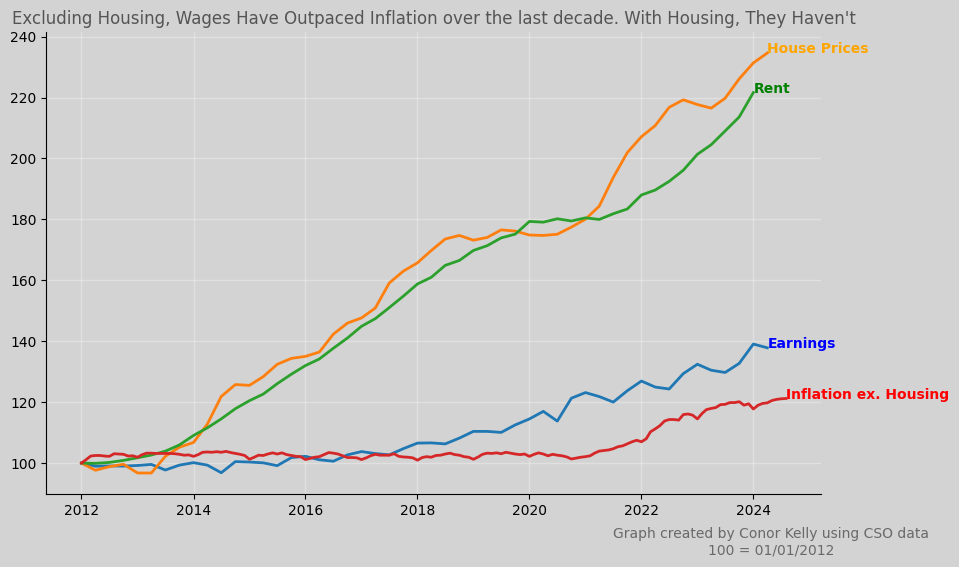

In [75]:



plt.style.use('../graph_style.mplstyle')

fig, ax = plt.subplots( figsize=(18, 9))
#fig.set_facecolor('lightgrey')
#ax.set_facecolor('lightgrey')
#ax.spines[['top','right']].set_visible(False)

#ax.grid(True, color='white',  linewidth=1, alpha=0.3)

ax.plot(wage['Quarter'] , wage['VALUE_REBASED'], label='Earnings', linewidth = 1.5, color='blue')
ax.plot(house ['Quarter'], house['VALUE_REBASED'], label='House Prices', linewidth = 1.5)
ax.plot(rent['Month'], rent['VALUE_REBASED'], label='Rent', linewidth = 1.5)
ax.plot(cpi['Month'], cpi['VALUE_REBASED'], label='Inflation ex. Housing', linewidth = 1.5)
#ax.plot(homeless['year'], homeless['homeless_rebased'], label='Homeless', linewidth = 2)
#ax2 = ax.twinx()
#ax2.plot(starts['Month'], starts['VALUE_REBASED'], label='Housing Starts', linewidth = 2)
#ax.plot(CPI_inc_housing['Month'], CPI_inc_housing['VALUE_REBASED'], label='Inflation inc. Housing', linewidth = 2)
ax.set_title("Excluding Housing, Wages Have Outpaced Inflation over the last decade. With Housing, They Haven't", alpha=0.6)


#annotating lines
ax.text(wage['Quarter'].iloc[-1], wage['VALUE_REBASED'].iloc[-1], 'Earnings', fontdict={'color':'blue', 'weight':'bold'})
ax.text(house['Quarter'].iloc[-1], house['VALUE_REBASED'].iloc[-1], 'House Prices', fontdict={'color':'orange', 'weight':'bold'})
ax.text(rent['Month'].iloc[-1], rent['VALUE_REBASED'].iloc[-1], 'Rent', fontdict={'color':'green', 'weight':'bold'})
ax.text(cpi['Month'].iloc[-1], cpi['VALUE_REBASED'].iloc[-1], 'Inflation ex. Housing', fontdict={'color':'red', 'weight':'bold'})

fig.text(0.85, 0.01, 'Graph created by Conor Kelly using CSO data\n100 = 01/01/2012', ha='center', fontsize=10)

#plt.getp(ax,'children')
ax.get_children()
plt.show()

#fig.savefig('figure.png', dpi=1000)

In [76]:
#reampling the starts data to quaterly to match completions
starts.set_index('Month', inplace=True)
starts = starts.resample('Q').sum()

#reasmpling both completions and starts to annual to compare total output in what the government talks about
completions.set_index('Quarter', inplace=True)

completions_annual = completions.resample('A').sum()
starts_annual = starts.resample('A').sum()


/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/2761257456.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  starts = starts.resample('Q').sum()
/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/2761257456.py:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  completions_annual = completions.resample('A').sum()
/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/2761257456.py:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  starts_annual = starts.resample('A').sum()


/var/folders/c3/7npz6xmx6bq7pfz0wyqtk4tw0000gn/T/ipykernel_54772/2628541.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.bar(completions_annual.index[-1] - pd.Timedelta(days=180), completions_annual['All house types'][-1],


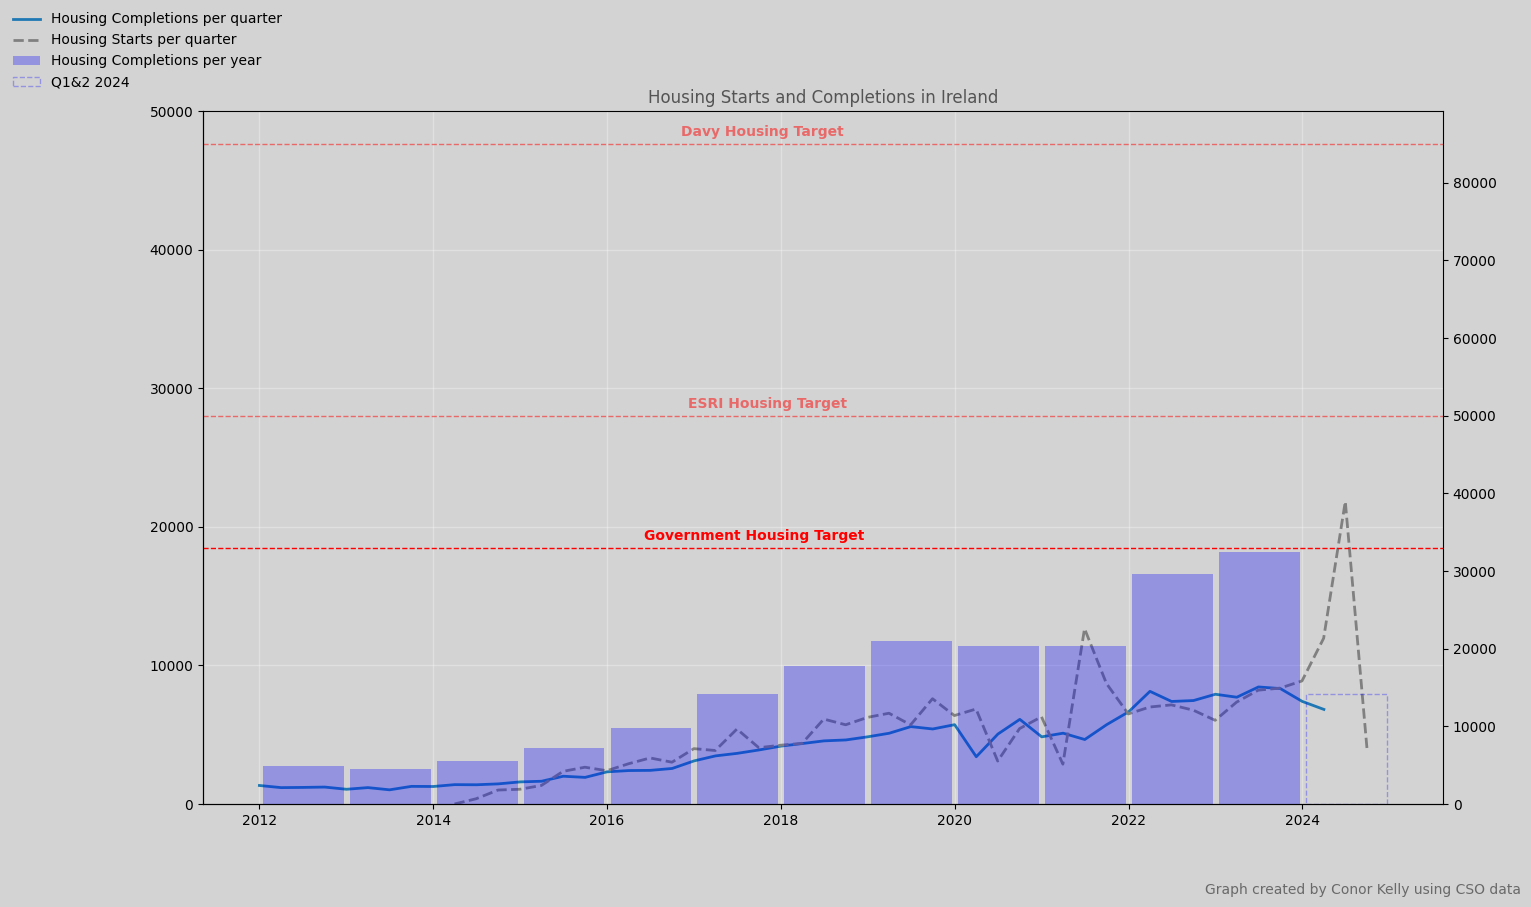

In [159]:
fig, ax = plt.subplots( figsize=(16, 9))
fig.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.grid(True, color='white',  linewidth=1, alpha=0.3)

ax.spines[['top','right']].set_visible(False)
ax.plot(completions['All house types'], label='Housing Completions per quarter', linewidth = 2)
ax.plot(starts['VALUE'],label='Housing Starts per quarter',linewidth = 2, color='grey', ls = '--')
ax.set_ylim(0, 50000)

ax2 = ax.twinx()
ax2.bar(completions_annual.index[:-1] - pd.Timedelta(days=180), completions_annual['All house types'][:-1], 
        label='Housing Completions per year', width=340, alpha=0.3, color='blue')
ax2.bar(completions_annual.index[-1] - pd.Timedelta(days=180), completions_annual['All house types'][-1],
    label='Q1&2 2024', width=340, alpha=0.3, color='blue', edgecolor='blue', linestyle='--', fill=False)

ax2.axhline(y=33000, color='red', linestyle='--', linewidth=1, )
ax2.axhline(y=50000, color='red', linestyle='--', linewidth=1,  alpha=0.5)
ax2.axhline(y=85000, color='red', linestyle='--', linewidth=1,  alpha=0.5)

ax2.text( pd.to_datetime('06-06-2016'),34000, 'Government Housing Target', fontdict={'color':'red', 'weight':'bold' , 'alpha':1})
ax2.text( pd.to_datetime('12-06-2016'),51000, 'ESRI Housing Target', fontdict={'color':'red', 'weight':'bold' , 'alpha':0.5})
ax2.text( pd.to_datetime('11-06-2016'),86000, 'Davy Housing Target', fontdict={'color':'red', 'weight':'bold' , 'alpha':0.5})

fig.text(0.85, 0.01, 'Graph created by Conor Kelly using CSO data', ha='center', fontsize=10, color='black', alpha=0.5)
fig.legend(loc='upper left', frameon=False)

ax.set_title('Housing Starts and Completions in Ireland', alpha=0.6)




plt.show()

In [56]:
starts.head()

,Statistic Label,Month,Residential Units Commenced,Local Authority,UNIT,VALUE,VALUE_REBASED
0,Commencement Notices,2014-03-01,Number of residential units,Ireland,Number,2,100.0
1,Commencement Notices,2014-04-01,Number of residential units,Ireland,Number,83,4150.0
2,Commencement Notices,2014-05-01,Number of residential units,Ireland,Number,79,3950.0
3,Commencement Notices,2014-06-01,Number of residential units,Ireland,Number,217,10850.0
4,Commencement Notices,2014-07-01,Number of residential units,Ireland,Number,326,16300.0


## Smoothing values


In [ ]:
# Function to compute moving average
'''def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

# Apply moving average with a window size of 5
sales_q['Smoothed'] = moving_average(sales_q['VALUE'], 5)
house['Smoothed'] = moving_average(house['VALUE'], 5)
wage['Smoothed'] = moving_average(wage['VALUE'], 5)
rent['Smoothed'] = moving_average(rent['VALUE'], 5)
'''


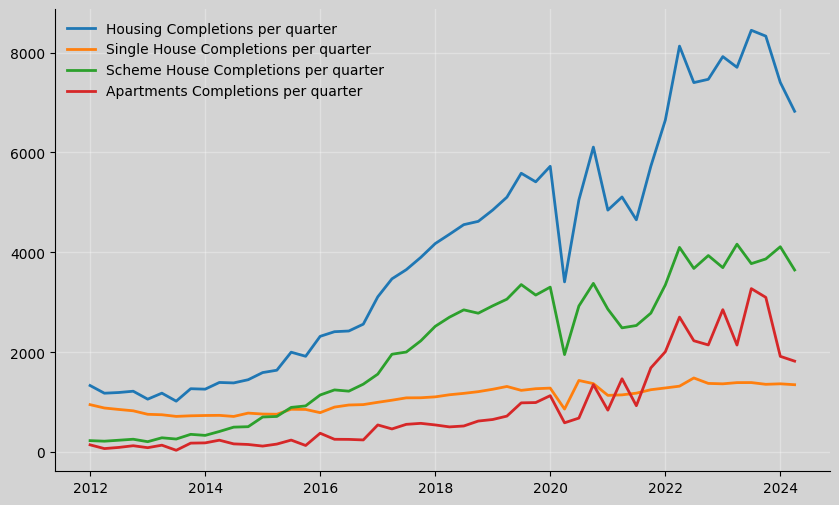

In [137]:
fig, ax = plt.subplots( figsize=(10, 6))
fig.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.grid(True, color='white',  linewidth=1, alpha=0.3)

ax.spines[['top','right']].set_visible(False)
ax.plot(completions['All house types'], label='Housing Completions per quarter', linewidth = 2)
ax.plot(completions['Single house'], label='Single House Completions per quarter', linewidth = 2)
ax.plot(completions['Scheme house'], label='Scheme House Completions per quarter', linewidth = 2)
ax.plot(completions['Apartment'], label='Apartments Completions per quarter', linewidth = 2)

legend = ax.legend()
legend.get_frame().set_facecolor('none')
legend.get_frame().set_edgecolor('none')

plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.plot(sales_q['Month'], sales_q['Smoothed'], label='Mean Sale Price')
ax.plot( wage['Quarter'], wage['Smoothed']*52*2*4,label = '4x wages, dual mean earnings')
ax.plot(wage['Quarter'], wage['Smoothed']*52*4, label='4x wages, single earner')
plt.show()

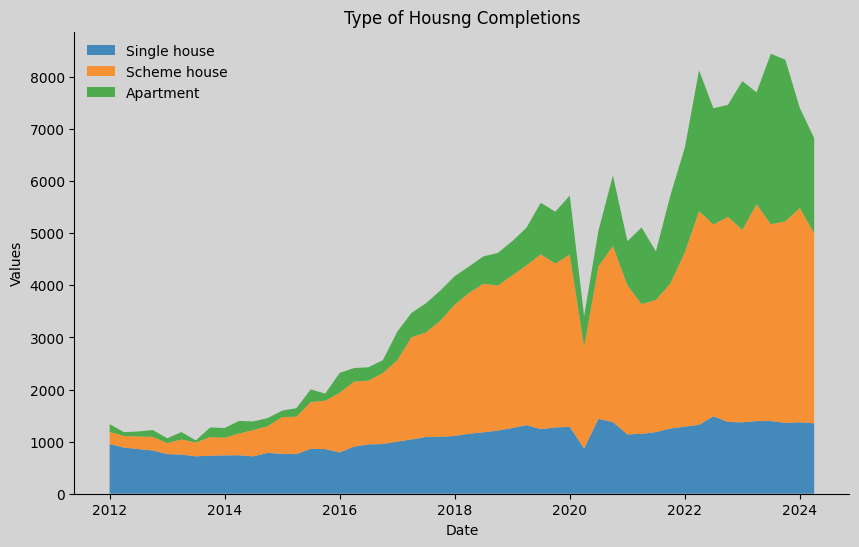

In [143]:


# Create a stacked area chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.stackplot(completions.index, completions['Single house'], 
             completions['Scheme house'], completions['Apartment'] , labels=completions.columns[2:], alpha=0.8)

# Add labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Values')
ax.set_title('Type of Housng Completions')

ax.legend(loc='upper left')
ax.legend(frameon=False)


fig.set_facecolor('lightgrey')
ax.set_facecolor('lightgrey')
ax.grid(False)

ax.spines[['top','right']].set_visible(False)

# Show the plot
plt.show()

In [ ]:
rent

In [ ]:
936*52
